In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Исходные данные

In [3]:
np.random.seed(42)

X = np.arange(1, 101)
Y = 5 * X + 7 + np.random.uniform(-20, 20, size=100)

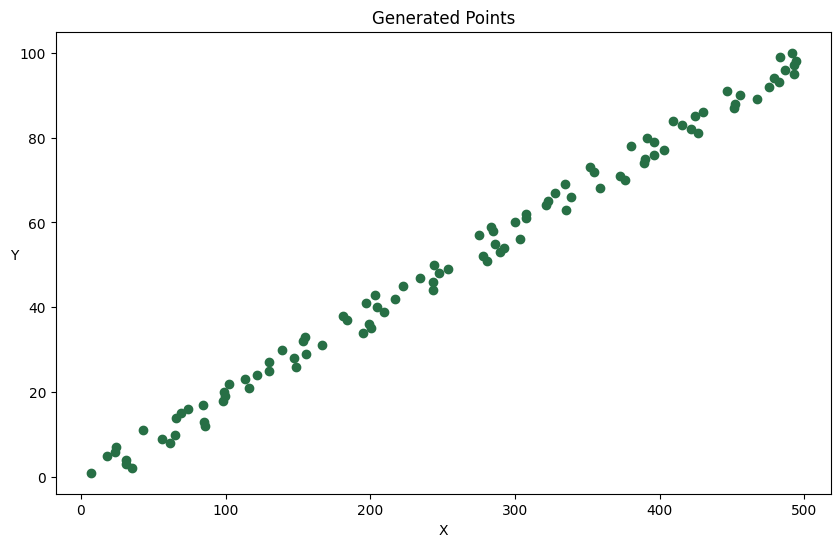

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(Y, X, color='#276f45')
plt.title('Generated Points')
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.show()

## Функция потерь

In [4]:
def loss_F(X, Y, w, b):
    return np.mean(np.power((w*X + b - Y), 2)) / 2

In [5]:
w_samp, b_samp = 0, 0
loss_F_samp = loss_F(X, Y, w_samp, b_samp)
loss_F_samp

np.float64(43881.52483259944)

## Частные производные

In [6]:
def grad_F_w(X, Y, w, b):
    return np.mean( (w * X + b - Y) * X )

def grad_F_b(X, Y, w, b):
    return np.mean(w * X - b - Y)

grad_F_w(X, Y, w_samp, b_samp), grad_F_b(X, Y, w_samp, b_samp)

(np.float64(-17217.664182773104), np.float64(-258.3072297351284))

## Градиентный спуск

In [7]:
w, b = 0, 0
lambda_ = 0.0001
i = 0
max_iterations = 10_000

In [11]:
while i <= max_iterations:
    w_new = w - lambda_ * grad_F_w(X, Y, w, b)
    b_new = b - lambda_ * grad_F_b(X, Y, w, b)
    
    if np.power((b_new - b)**2 + (w_new - w)**2, 0.5) <= 0.001:
        break

    i = i + 1
    w, b = w_new, b_new

print(w, b, i)

5.085562483559595 0.07864349280507366 19


In [15]:
df = pd.DataFrame({'X': X, 'Y': Y})

model = LinearRegression()
model.fit(df[['X']], df['Y'])
sk_w = model.coef_[0]
sk_b = model.intercept_

sk_w, sk_b

(np.float64(5.008279725351478), np.float64(5.389103604878727))

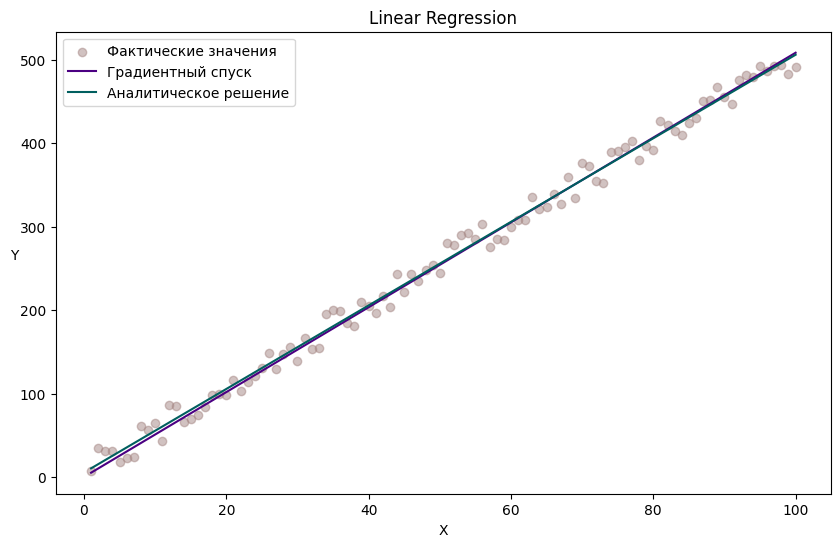

In [24]:
plt.figure(figsize=(10, 6))

plt.scatter(df['X'], df['Y'], color='#a58784', label='Фактические значения', alpha=0.5)
plt.plot(df['X'], w * df['X'] + b, color='#4b0082', label='Градиентный спуск')
plt.plot(df['X'], sk_w * df['X'] + sk_b, color='#005f5f', label='Аналитическое решение')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y', rotation=0)
plt.legend()
plt.show()